In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import kagglehub
import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("shibumohapatra/house-price")
df = pd.read_csv("/kaggle/input/house-price/1553768847-housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [53]:
# Encoding the 'ocean_proximity' column
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [54]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [55]:
df.shape

(20640, 10)

In [56]:
# Summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [57]:
# Checking for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [58]:
df = df.dropna()
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

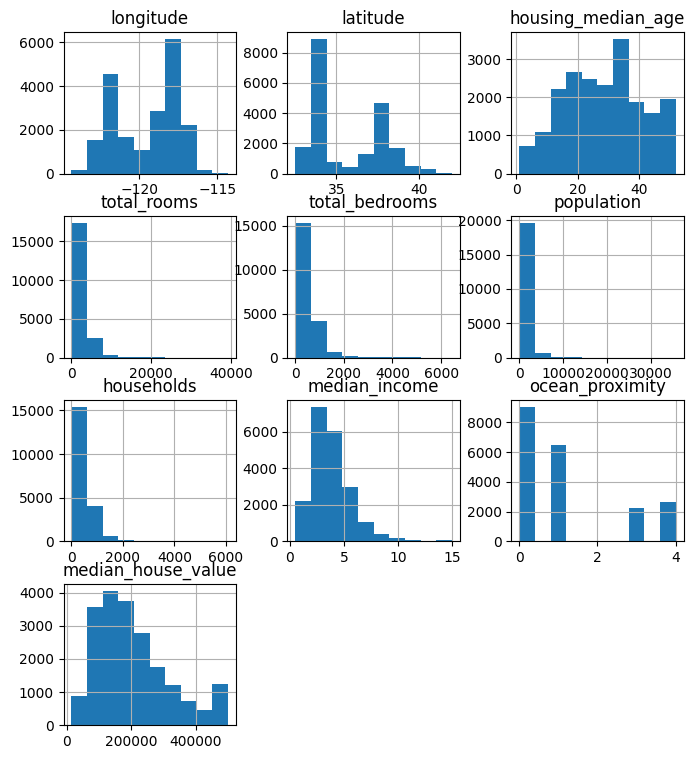

In [59]:
# Histograms for numerical columns
df.hist(figsize=(8, 9))
plt.show()

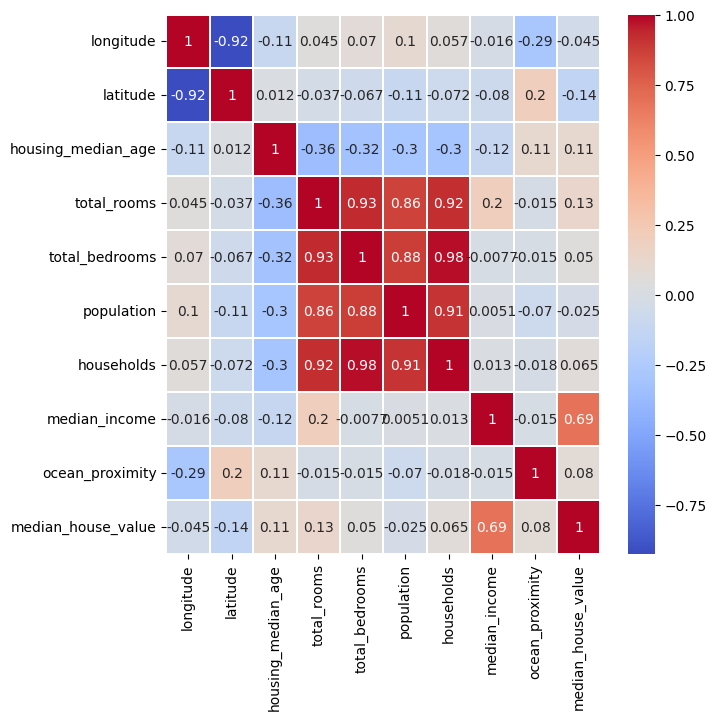

In [60]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

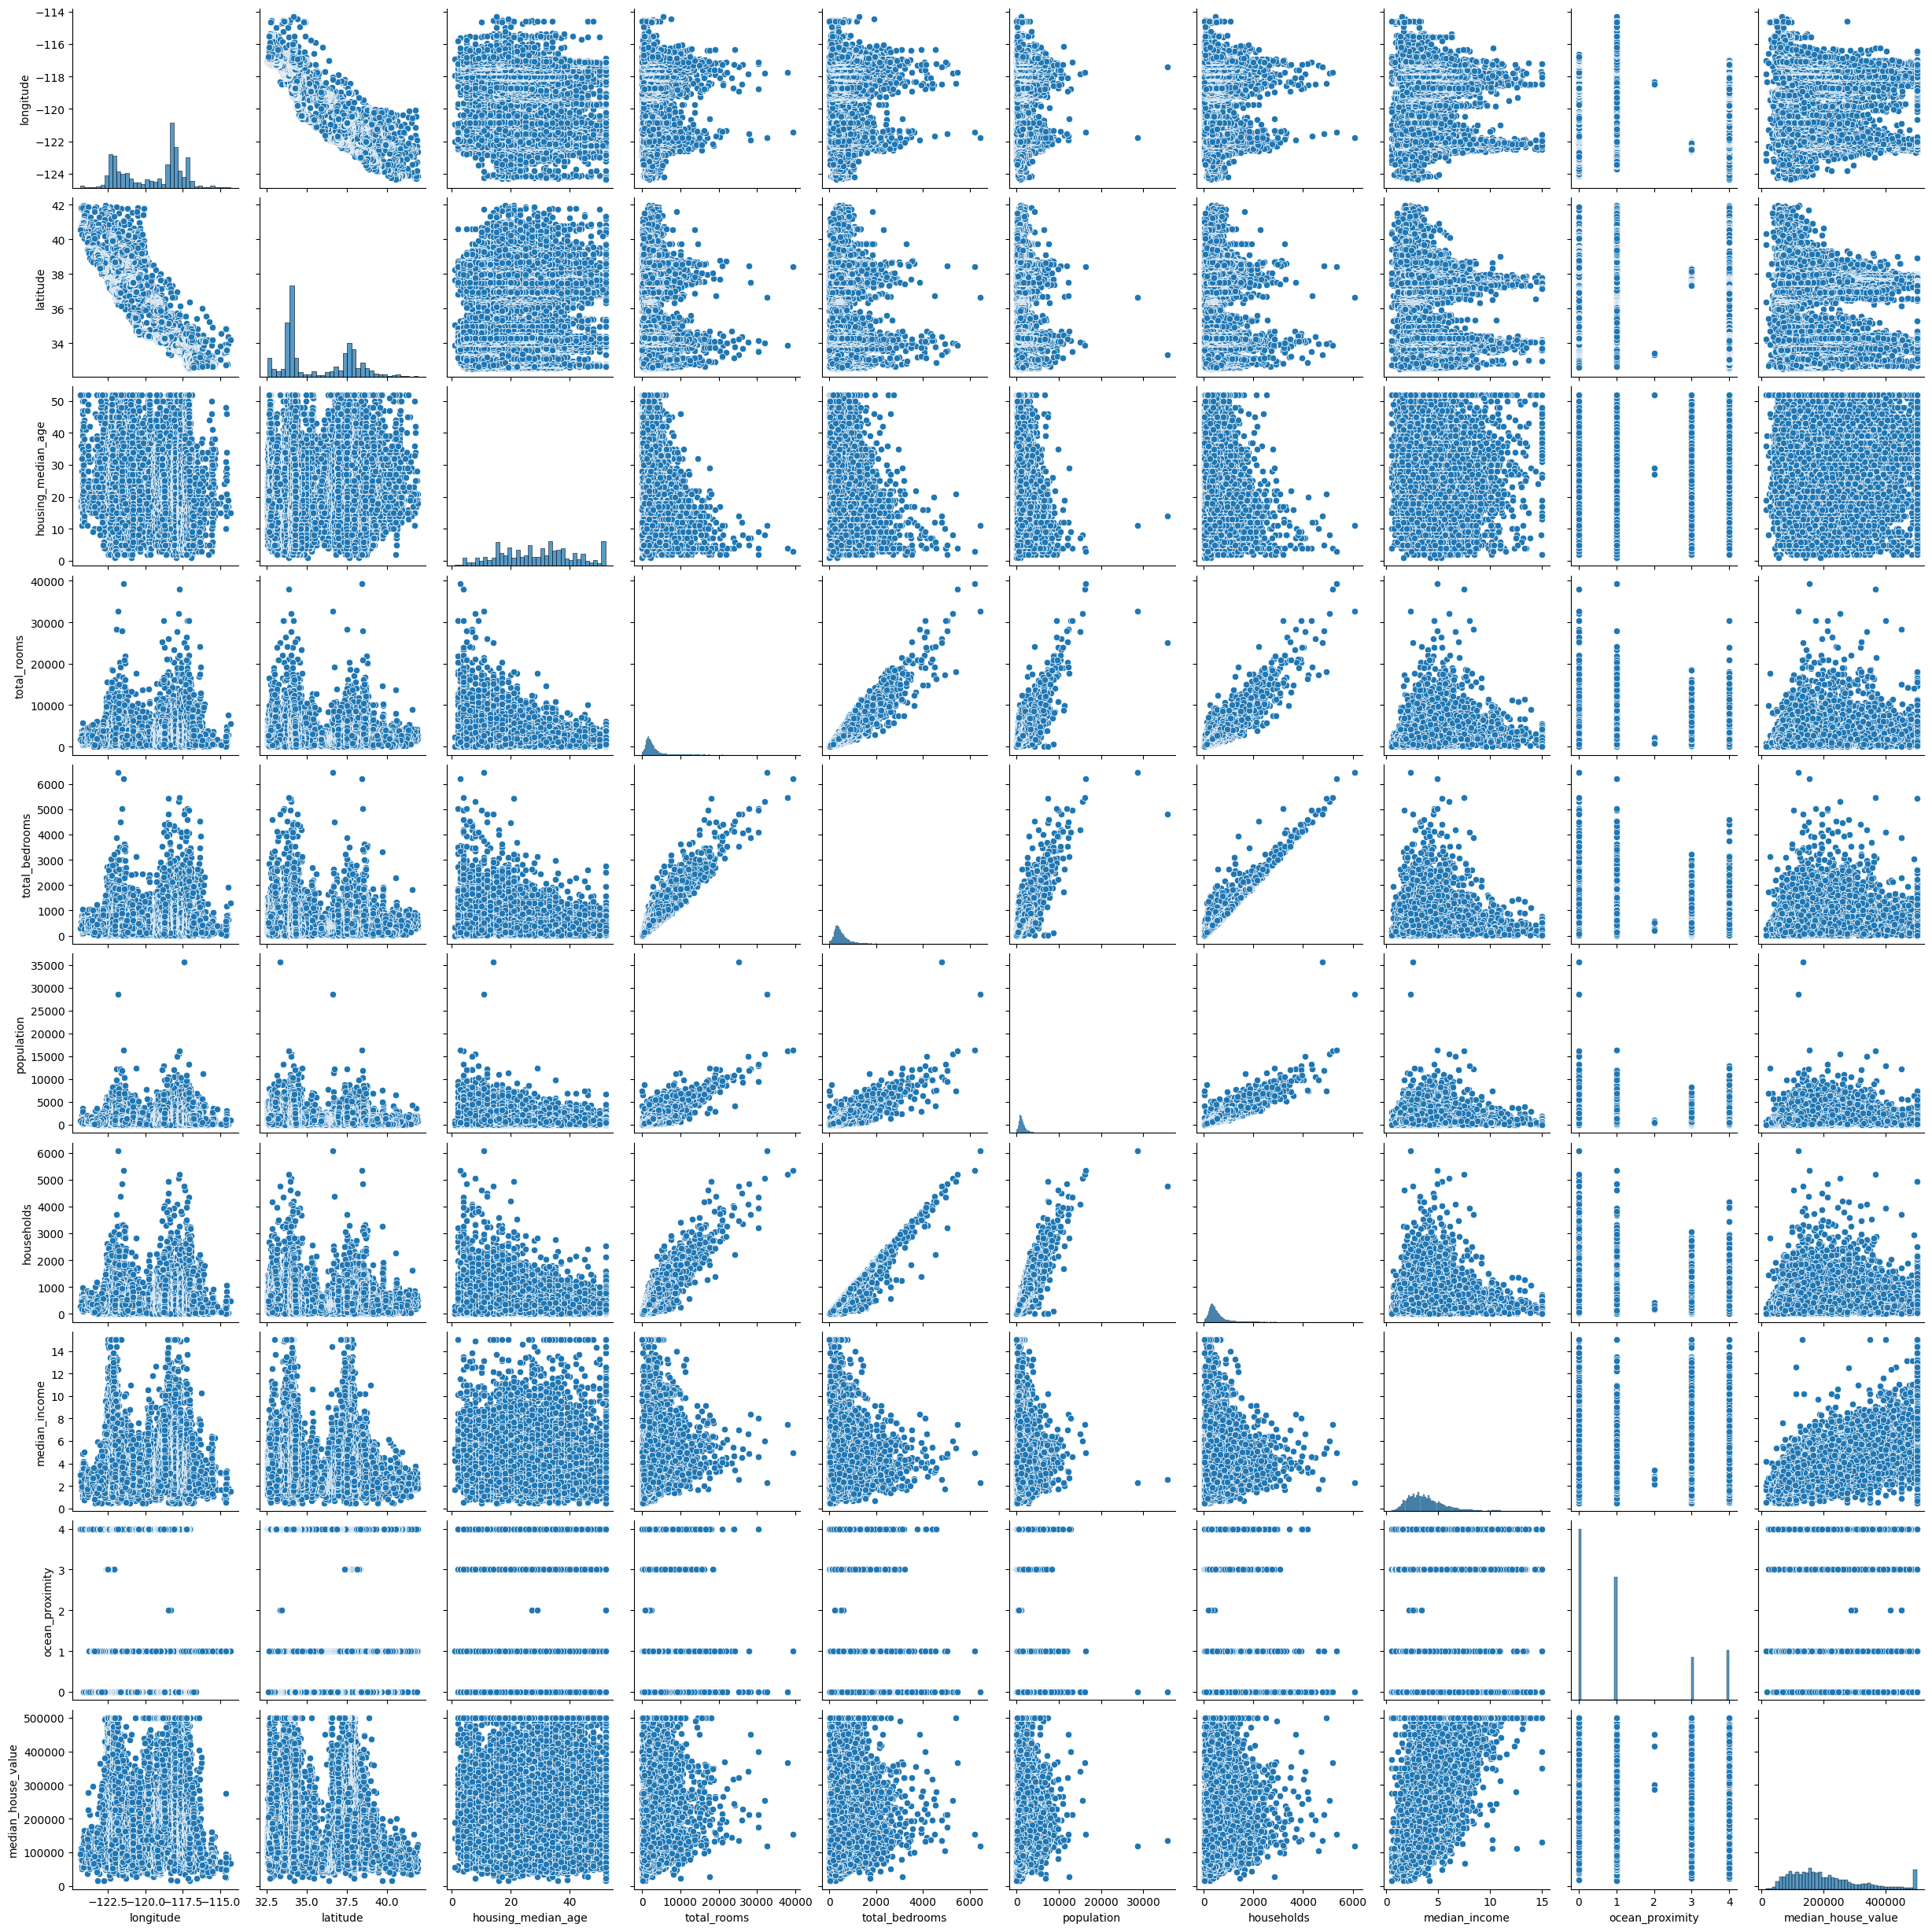

In [61]:
# Pairplot to observe relationships
sns.pairplot(df)
plt.show()

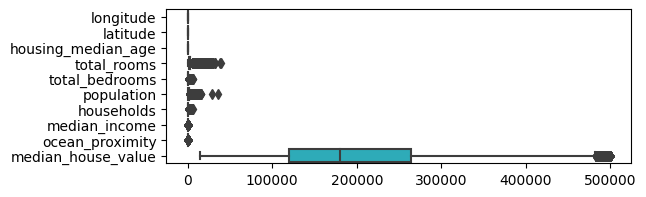

In [62]:
# Boxplots to observe distributions
plt.figure(figsize=(6, 2))
sns.boxplot(data=df, orient='h')
plt.show()

In [63]:
# Selecting features and target variable
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
X = df[features]
y = df['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


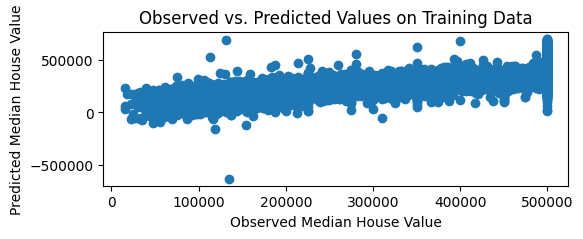

In [64]:
# Plotting observed vs. predicted values for training data
plt.figure(figsize=(6,2))
plt.scatter(y_train, y_pred_train)
plt.xlabel('Observed Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Observed vs. Predicted Values on Training Data')
plt.show()

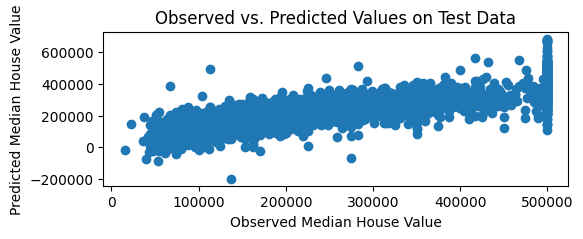

In [65]:
# Plotting observed vs. predicted values for test data
plt.figure(figsize=(6,2))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Observed Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Observed vs. Predicted Values on Test Data')
plt.show()

In [66]:
# Calculating the R-squared value for the training data
r2_train = model.score(X_train, y_train)
print(f'R-squared on Training Data: {r2_train}')

# Calculating the R-squared value for the test data
r2_test = model.score(X_test, y_test)
print(f'R-squared on Test Data: {r2_test}')


R-squared on Training Data: 0.636039119275638
R-squared on Test Data: 0.6399236679243365


In [67]:
# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Training Data: {mse_train}')
print(f'Mean Squared Error on Test Data: {mse_test}')

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Training Data: {mae_train}')
print(f'Mean Absolute Error on Test Data: {mae_test}')

Mean Squared Error on Training Data: 4817705934.657081
Mean Squared Error on Test Data: 4924108937.912002
Mean Absolute Error on Training Data: 50630.49743658007
Mean Absolute Error on Test Data: 51388.700189508156
